In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('articles_dataset_4.csv')
# filtrando alguns símbolos poluíndo o dataset
articles_df = df.replace(r'\r+|\n+|\t+','', regex=True)
articles_df = articles_df.replace(',,,','', regex=True)
articles_df = articles_df.replace(',,','', regex=True)
articles_df = articles_df.replace('’','', regex=True)
articles_df = articles_df.replace('—','', regex=True)
articles_df = articles_df.replace('�','', regex=True)
articles_df = articles_df.replace(r'\b,$','', regex=True)
articles_df = articles_df.replace('',np.nan, regex=True)
# removendo a coluna do abstract 3
articles_df = articles_df.drop(columns=['abstract3'])
# removendo linhas sem resumo ou palavras chave
articles_df = articles_df.dropna(subset=['abstract', 'abstract2'], how='all')
articles_df = articles_df.dropna(subset=['keywords_name'])
articles_df = articles_df.reset_index(drop=True)
# preenchendo colunas com NaN com lacunas em branco para poder mesclar as colunas de resumo
articles_df = articles_df.replace(np.nan, '', regex=True)
articles_df['abstract3'] = articles_df['abstract'] + articles_df['abstract2']

# removing duplicated columns and renaming columns
articles_df = articles_df.drop(columns=['abstract','abstract2'])
articles_df.rename(columns = {'abstract3': 'abstract', 'keywords_name': 'keywords', 'paper_name': 'article_title'}, inplace = True)

# removing visibly wrong articles
articles_df = articles_df.drop(71)
articles_df = articles_df.drop(196)
articles_df = articles_df.drop(222)
articles_df = articles_df.drop(304)
articles_df = articles_df.drop(575)
articles_df = articles_df.drop(960)
articles_df = articles_df.drop(988)
articles_df = articles_df.drop(1065)
articles_df = articles_df.reset_index(drop=True)

# mudando todas as letras para caixa baixa
articles_df['article_title'] = articles_df['article_title'].str.lower()
articles_df['keywords'] = articles_df['keywords'].str.lower()
articles_df['abstract'] = articles_df['abstract'].str.lower()

articles_df['keywords'] = articles_df['keywords'].str[1:] # removing comma from start of keywords


symbols = "\"#%&()*+-.,/:;=?_\n“”'" # com vírgula para o abstract
for i in symbols:  
    articles_df['abstract'] = articles_df['abstract'].map(lambda x: x.replace(i,''))

symbols2 = "\"#%&()*+-./:;=?_\n“”'" # sem remover a vírgula na coluna de keywords
for i in symbols2:  
    articles_df['keywords'] = articles_df['keywords'].map(lambda x: x.replace(i,''))

    
# saving and showing main dataset
display(articles_df)
articles_df.to_csv('data_corrected.csv')

,article_title,keywords,publishing_date,abstract
0,systematic review of enhancement of artificial...,"artificial bee colony, pheromone, ant colony",2021-08-23,the artificial bee colony abc is a wellstudied...
1,the acceptance of mobile learning: a case stud...,"mlearning, 3dsimulation, android",2021-09-06,this study investigates the adoption of the mo...
2,the relationship pattern of internet usage fre...,"correspondence analysis, generation z, interne...",2021-09-20,generation z students mount challenges to deve...
3,the development of video on pickled fruit prod...,"mlearning, multimedia learning, demonstration ...",2021-10-12,undergraduate students are categorized as gene...
4,social networks apps and their role in tourism...,"social networks apps, mobile, tourism marketin...",2021-10-25,this study aimed at investigating the role of ...
...,...,...,...,...
1285,two models based on social relations and svd++...,"recommendation system, svd , social relations...",2021-01-12,recently recommender systems rss have attracte...
1286,gadget-based interactive multimedia on socio-s...,"socio scientific issues, gadget based, interac...",2021-01-12,students science literacy in indonesia is cons...
1287,the development of e-worksheet using kvisoft f...,"eworksheet, critical thinking, lesson study",2021-01-12,the effectivity and efficiency of the learning...
1288,understanding issues affecting students commit...,"online discussion forum, students commitment, ...",2021-01-12,this study explored students commitment and fa...


In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
articles_df_2 = articles_df
articles_df_2['abstract'] = articles_df_2['abstract'].map(lambda x: 
                ' '.join([word for word in x.split() if word not in (stop)]))

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
articles_df_2['abstract'] = articles_df_2['abstract'].map(lambda x: 
                ' '.join([stemmer.stem(y) for y in x.split(' ')]))

display(articles_df_2.head(10))
articles_df_2.to_csv('articles_df_2.csv')

,article_title,keywords,publishing_date,abstract
0,systematic review of enhancement of artificial...,"artificial bee colony, pheromone, ant colony",2021-08-23,artifici bee coloni abc wellstudi algorithm de...
1,the acceptance of mobile learning: a case stud...,"mlearning, 3dsimulation, android",2021-09-06,studi investig adopt mobil learn 3d simul andr...
2,the relationship pattern of internet usage fre...,"correspondence analysis, generation z, interne...",2021-09-20,generat z student mount challeng develop teach...
3,the development of video on pickled fruit prod...,"mlearning, multimedia learning, demonstration ...",2021-10-12,undergradu student categor generat z prefer le...
4,social networks apps and their role in tourism...,"social networks apps, mobile, tourism marketin...",2021-10-25,studi aim investig role social network app tou...
5,scalability of mobile cloud storage,"mobile cloud storage, scalability, data manage...",2021-11-09,today high demand mobil cloud storag mcs servi...
6,developing an interactive university orientati...,"smartphone apps, higher institution, gamificat...",2021-11-19,use app becom increas common higher institut o...
7,integrating cloud with self service kiosk: an ...,"self service kiosk ssk, cloud computing, selfs...",2021-12-08,selfservic kiosk invent move technolog improv ...
8,deep learning technique of sentiment analysis ...,"deep learning, sentiment analysis, twitter, tw...",2022-01-18,sentiment investig progress calcul recogn well...
9,digital comic media for teaching secondary sch...,"digital comics media, augmented reality, teach...",2022-02-10,rapid develop scienc technolog 21st centuri de...


mobilelearning       137
mlearning             72
mobileapplication     59
elearning             56
augmentedreality      50
android               35
highereducation       32
mobiledevices         29
iot                   26
covid19               23
onlinelearning        20
internetofthings      20
mobile                20
virtualreality        19
smartphone            19
dtype: int64

,0,year
14,mobilelearning,2007
48,mobilelearning,2022
68,mobilelearning,2022
77,mobilelearning,2022
92,mobilelearning,2022
...,...,...
1274,mobilelearning,2021
1275,mobilelearning,2021
1281,mobilelearning,2021
1283,mobilelearning,2021


2020    23
2021    15
2015    12
2018    12
2019    11
2022    10
2009    10
2010     9
2016     8
2008     7
2011     5
2014     5
2017     5
2013     4
2007     1
Name: year, dtype: int64

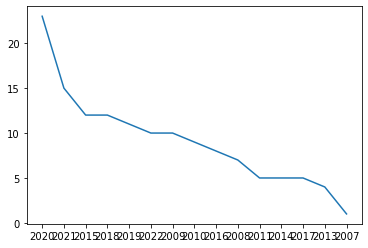

In [66]:
import matplotlib.pyplot as plt

# generating dataset with keywords
articles_keywords = articles_df['keywords'].str.split(',', expand=True)


articles_keywords = articles_keywords.replace(' ','', regex=True)
articles_keywords = articles_keywords.replace('',np.nan, regex=True)

articles_keywords.to_csv('keywords_split.csv')

articles_keywords_2 = articles_keywords.stack()
count = articles_keywords_2.value_counts()
display(count.head(15))
articles_keywords_2.to_csv('keywords.csv')

# display(articles_keywords)

# count.to_csv('keywords_count.csv')
# count_2 = pd.read_csv('keywords_count.csv')

articles_keywords = articles_keywords.where(articles_keywords == "mobilelearning", np.nan)
articles_keywords = articles_keywords.replace(np.nan, '', regex=True)

articles_keywords.to_csv('keywords_check_2.csv')
articles_keywords = articles_keywords.sum(axis=1)
articles_keywords = articles_keywords.to_frame()
articles_keywords = articles_keywords.replace('', np.nan, regex=True)
#for i in np.arange(1,16):
#    articles_keywords = articles_keywords.drop(columns=[i])
# articles_keywords = articles_keywords.insert(1,'year',articles_df['publishing_date'].str[0:4])
articles_keywords['year'] = articles_df['publishing_date'].str[0:4]
articles_keywords = articles_keywords.dropna(axis=0)
articles_keywords.to_csv('keywords_check.csv')
display(articles_keywords)
mobilelearning = articles_keywords['year'].value_counts()
display(mobilelearning)
plt.plot(mobilelearning)
# articles_keywords[0] = articles_keywords[0] + articles_keywords[1] + 
# #articles_keywords[2] + articles_keywords[3] + articles_keywords[4] + 
# #articles_keywords[5] + articles_keywords[6] + articles_keywords[7] + 
# #articles_keywords[8] + articles_keywords[9] + articles_keywords[10] + 
# #articles_keywords[11] + articles_keywords[12] + articles_keywords[13] + 
# #articles_keywords[14] + articles_keywords[15]
# keywords = [mobilelearning , mlearning , mobileapplication , elearning , augmentedreality , android , highereducation ,
# mobiledevices , iot , covid19 , onlinelearning , internetofthings , mobile , virtualreality , smartphone]

In [6]:
discard = 'machinelearning'
articles_keywords_droped = articles_keywords
# Removing articles that have mobilelearning keyword on the 1st column
articles_keywords_droped = articles_keywords_droped.drop(articles_keywords_droped.index[[48, 68, 77, 93, # Relevance 2
95, 196, 206, 208, 216, 217, 222, 223, 226, 229, 230, 254, 258, 274, 277, 306, 310, 315, 318, 327, 332, 344,
352, 361, 371, 426, 445, 481, 501, 519, 523, 581, 592, 598, 604, 618, 629, 649, 683, 690, 708, 715, 727, 746,
750, 817, 843, 864, 866, 874, 979, 980, 1013, 1018, 1040, 1061, 1087, 1128, 1051, 1261, 1283, # on 2nd column >
108, 180, 207, 220, 235, 249, 253, 256, 283, 329, 342, 350, 384, 403, 448, 460, 512, 514, 573, 603, 609, 631,
637, 668, 669, 704, 712, 860, 862, 863, 865, 885, 886, 915, 1055, 1102, 1106, 1109, 1112, 1171, 1174, 1183,
1190, 1197, 1221, 1284, # on 3rd column >
14, 121, 238, 248, 270, 282, 285, 298, 313, 333, 358, 386, 474, 
500, 515, 632, 702, 770, 859, 861, 1033, 1122, 1258, 1275, # on 4th column >
92, 210, 281, 284, 297, 330, 334, 355, 373, 379, 405, 455, 617, 867, 950, 1202, 1274, 1281, # on 5th and 6th column >
302, 377, 489, 596, 745, 513, 1130, # m-learning on 1st column >
1, 3, 17, 105, 215, 255, 259, 267, 269, 288, 326, 331, 383, 391, 440, 447, 449, 467, 491, 502, 540,
570, 579, 600, 628, 641, 685, 694, 725, 749, 806, 875, 1143, 1157, # on 2nd column >
205, 212, 239, 250, 268, 303, 311, 378, 409, 482, 614, 1031, 1278, # on 3rd, 4th, 5th and 6th column >
18, 225, 232, 300, 304, 480, 625, 769, 1160, 299, 307, 81, 314, 401, 613, 634, 868, 414, 831, # e-learning>
34, 58, 61, 62, 71, 146, 200, 224, 251, 261, 278, 301, 305, 323, 399, 417, 472, 548, 557, 653, 666, 678, 828, 929, 933,
990, 1002, 1012, 1054, 1070, 1114, 1120, 1123, 1167, 1176, 1256, 1259, # Relevance 1  # iot / internet of things >
46, 51, 59, 97, 104, 110, 122, 131, 187, 462, 465, 577, 643, 681, 779, 807, 811, 891, 917, 959, 966, 1005,
1011, 1084, 1085, 1092, 1100, 1134, 1137, 1139, 1147, 1152, 1164, 1165, 1172, 1178, 1217, 1245, 30, 40, 1267, 
47, 389, 421, 468, 550, 556, 812, 851, 938, 944, 1077, 1081, 1191, 1220, 1268, 456, # augmented reality >
9, 23, 32, 38, 50, 54, 60, 66, 83, 84, 85, 102, 116, 118, 123, 132, 181, 257, 322, 359, 360,
363, 370, 380, 428, 500, 516, 522, 526, 531, 532, 549, 639, 646, 691, 760, 762, 795, 818, 835, 945, 971, 972, 993, 
1003, 1004, 1015, 1034, 1043, 1149, 1153, 1162, 1173, 1218, 1232, 1233, 1239, 1241, 1242, 1264, # mobile application >
70, 80, 529, 601, 732, 737, 753, 758, 840, 905, 906, 940, 1206, 1219, # Relevance 0 security >
67, 96, 106, 113, 186, 191, 201, 204, 213, 219, 459, 537, 569, 574, 583, 584, 591, 606, 624, 776, 786, 791, 813, 853,
894, 956, 970, 1016, 1099, 1166, 1227, 1253, 1260, # machinelearning >
112, 904, 1247, 188, 693, 1014, 1163, 98, 175, 1028, 1271, 107, 889, 1035, 1131, 1158, 726, 664, # text-data mining >
10, 86, 109, 111, 130, 320, 485, 553, 588, 650, 995, 1104, 1156, # mobile application >
35, 63, 144, 151, 264, 393, 397, 402, 422, 434, 451, 458, 461, 496, 506, 510, 518, 520, 547, 563, 564,
567, 571, 607, 612, 622, 676, 686, 706, 744, 808, 829, 832, 833, 849, 898, 903, 914, 974, 986, 1023,
1062, 1065, 1132, 1135, 1222, 1234, 1235, 1273]])
articles_keywords_3 = articles_keywords_droped
articles_keywords_3 = articles_keywords_3.rename(columns={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'
, 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P'})
articles_keywords_3 = articles_keywords_3.replace(' ','', regex=True)
# print(articles_keywords_3)

non_mlearning_0 = articles_keywords_3[articles_keywords_3.A.str.contains(discard)==False]
# non_mlearning_0 = non_mlearning_0.reset_index(drop=True)
print(non_mlearning_0)

                           A                          B  \
0        artificialbeecolony                  pheromone   
2     correspondenceanalysis                generationz   
4         socialnetworksapps                     mobile   
5         mobilecloudstorage                scalability   
6             smartphoneapps          higherinstitution   
...                      ...                        ...   
1285    recommendationsystem                        svd   
1286   socioscientificissues                gadgetbased   
1287              eworksheet           criticalthinking   
1288   onlinediscussionforum         studentscommitment   
1289       interactivemobile  mathematicsproblemsolving   

                          C                    D            E     F     G  \
0                 antcolony                 None         None  None  None   
2                  internet       teachingmethod         None  None  None   
4          tourismmarketing  tourismorganization         Non

In [7]:
non_mlearning = non_mlearning_0.stack()
# articles_keywords_2 = articles_keywords_2.drop(columns=[0])
# non_mlearning = non_mlearning.replace(' ','', regex=True)
non_mlearning = non_mlearning.replace('',np.nan, regex=True)
display(non_mlearning)


count_non = non_mlearning.value_counts()
display(count_non)
non_mlearning.to_csv('keywords_non_mlearning.csv')
count_non.to_csv('keywords_count_non_mlearning.csv')

count_2_non_mlearning = pd.read_csv('keywords_count_non_mlearning.csv')
# display(count_2)

# count_3 = count_2_non_mlearning.columns[count_2_non_mlearning.columns.str.contains(pat = 'mobile')] 
print(count_2_non_mlearning)

0     A          artificialbeecolony
      B                    pheromone
      C                    antcolony
2     A       correspondenceanalysis
      B                  generationz
                     ...            
1288  B           studentscommitment
      C         undergraduatecourses
1289  A            interactivemobile
      B    mathematicsproblemsolving
      C                 society50era
Length: 3715, dtype: object

android                 21
mobiledevices           20
mobile                  16
covid19                 15
learning                15
                        ..
discriminantanalysis     1
smsadvertising           1
infotainment             1
digitallearning          1
society50era             1
Length: 2725, dtype: int64

                Unnamed: 0   0
0                  android  21
1            mobiledevices  20
2                   mobile  16
3                  covid19  15
4                 learning  15
...                    ...  ..
2720  discriminantanalysis   1
2721        smsadvertising   1
2722          infotainment   1
2723       digitallearning   1
2724          society50era   1

[2725 rows x 2 columns]


In [8]:
# New dataframe for tf-idf, list with mobile-learning abstracts, relevance 2
list = [48, 68, 77, 93, 95, 196, 206, 216, 217, 222, 223, 226, 229, 230, 254, 258, 274] # 208, 277, 306, 310, 315, 318, 327, 332, 344
# append values with relevance 1 IOT, augmented reality and mobile application
relevance_1 = []#9, 23, 32, 38, 50, 54, 46, 51, 59, 97, 104, 70, 80, 529, 601, 732, 737] # 17
list = list + relevance_1
# append values with relevance 0
relevance_0 = []#67, 96, 106, 113, 186, 191, 10, 86, 109, 111, 130, 35, 63, 144, 151, 264] # 16
list = list + relevance_0

list = [48, 68, 77, 93, 95, 196, 206, 216, 217, 222, 223, 226, 229, 230, 254, 258, 274, 208, 277, 306, 310, 315, 318, 327, 332, 344, 
352, 361, 371, 426, 445, 481, 501, 519, 523, 581, 592, 598, 604, 618, 629, 649, 683, 690, 708, 715, 727, 746, 750, 817,
9, 23, 32, 38, 50, 54, 46, 51, 59, 97, 104, 70, 80, 529, 601, 732, 737, 17 , 1011, 1084, 1085, 1092, 1100, 1134, 1137, 1139, 
1147, 1152, 1164, 1165, 1172, 1178, 370, 380, 428, 500, 516, 522, 526, 531, 1220, 1268, 753, 758, 840, 905, 906, 940, 1206, 1219,
112, 904, 1247, 188, 693, 1014, 1163, 98, 175, 1028, 10, 86, 109, 111, 130, 320, 485, 553, 588, 650, 35, 63, 144, 151, 264, 393, 397, 
402, 422, 434, 451, 458, 461, 496, 506, 510, 518, 520, 547, 563, 564, 567, 571, 607, 612, 622, 676, 686, 706, 744] 

data_tfidf = articles_df.iloc[list]
data_tfidf = data_tfidf.drop(columns=['keywords', 'publishing_date'])
print(data_tfidf)
data_tfidf.to_csv('data_tfidf.csv')

                                         article_title  \
48   supporting factors for the implementation of m...   
68   android-based mobile learning resource for che...   
77   solving technological, pedagogical, and psycho...   
93   factors influencing the acceptance of mobile l...   
95   factors affecting students desire to take upco...   
..                                                 ...   
622  branded apps in spain as a means of communicat...   
676  mobile application development of managing eld...   
686  collaborative cassava-chip supply chain mobile...   
706  requirement model of conference management sys...   
744  mobile application based modified screening an...   

                                              abstract  
48   the aim of this research is to determine the s...  
68   this study aimed to develop an android learnin...  
77   this paper aims to explore the various problem...  
93   ,the saudi arabian government is committed to ...  
95   since 2020, c

In [9]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
pd.options.display.max_colwidth = 200  # set a value as your need

data_tfidf_3 = data_tfidf

symbols = "!\"#$%&()*+-.,/:;<=>?@[\]^_`{|}~\n"
for i in symbols:  
    data_tfidf_3['abstract'] = data_tfidf_3['abstract'].map(lambda x: x.replace(i,''))
    
data_tfidf_3['stemmed'] = data_tfidf_3.abstract.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
data_tfidf_3.stemmed.head()

# Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english') #, min_df=1, max_df=.5, ngram_range=(1,3)

# Calculate all the n-grams found in all documents
from itertools import islice
cvec.fit(data_tfidf_3.stemmed)
islice(cvec.vocabulary_.items(), 20)

# len(cvec.vocabulary_)

cvec_counts = cvec.transform(data_tfidf_3.stemmed)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
print(counts_df.sort_values(by='occurrences', ascending=False).head(14))

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
# transformed_weights

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
print(weights_df.sort_values(by='weight', ascending=False).head(14))

counts_df.to_csv('counts_tfidf.csv')
weights_df.to_csv('weights_tfidf.csv')
data_tfidf_3.to_csv('data_tfidf_3.csv')

sparse matrix shape: (150, 2680)
nonzero count: 10641
sparsity: 2.65%
           term  occurrences
1384      learn          412
1564      mobil          354
2540        use          344
259      applic          251
2326    student          196
715     develop          170
2331      studi          165
2031   research          117
2042     result          113
2391  technolog          108
808        educ          103
658        data          102
347        base          101
1570      model           94
           term    weight
1384      learn  0.083292
1564      mobil  0.066084
2540        use  0.052748
259      applic  0.051742
2326    student  0.048503
715     develop  0.036114
2331      studi  0.034537
808        educ  0.029759
2031   research  0.029051
2391  technolog  0.027071
717       devic  0.026373
706      design  0.025855
1570      model  0.024909
658        data  0.024504


In [11]:
'''
322     learn           96
364     mobil           58
606       use           36
552   student           34
555     studi           28
191      educ           27
601   univers           22
150     cours           19
345     manag           18
88   bachelor           16
366     model           16
489    result           15
174   develop           15
70     applic           15

322      learn  0.170411
364      mobil  0.112818
606        use  0.079719
552    student  0.071921
150      cours  0.070644
88    bachelor  0.067454
555      studi  0.066476
191       educ  0.057925
601    univers  0.053741
573  technolog  0.051780
366      model  0.050232
345      manag  0.048463
254       game  0.047460
174    develop  0.046808
'''
'''
674       learn          144
762       mobil          105
1267        use          104
1166    student           86
126      applic           82
1170      studi           66
362     develop           54
399        educ           51
330        data           41
1017   research           38
1026     result           37
1201  technolog           37
764       model           34
171        base           30

674       learn  0.100505
762       mobil  0.073925
1166    student  0.065201
1267        use  0.059423
126      applic  0.055630
399        educ  0.043893
1170      studi  0.042884
362     develop  0.042185
304       cours  0.033857
740       media  0.032450
1201  technolog  0.032262
1017   research  0.032167
764       model  0.031180
634         iot  0.029863
'''
dataset_p_sim = data_tfidf_5
dataset_p_sim = dataset_p_sim.reset_index(drop=True)
dataset_p_sim = dataset_p_sim.drop(columns=['abstract','abstract_without_stopwords'])
# dataset_p_sim['words'] = 'learn mobil use student cours bachelor studi educ univers technolog model manag game'
# dataset_p_sim['words'] = 'learn use student studi educ univers cours bachelor model manag'
# dataset_p_sim['words'] = 'learn mobil use student studi educ technolog design devic univers'
dataset_p_sim['words'] = 'learn mobil use student studi educ technolog design cours'
dataset_p_sim['relevance'] = 2
#for i in range(17,34):
#    dataset_p_sim.at[i,'relevance']=1
for i in range(50,100):
    dataset_p_sim.at[i,'relevance']=1
for i in range(100,150):
    dataset_p_sim.at[i,'relevance']=0
dataset_p_sim.rename(columns = {'stemmed': 'abstract'}, inplace = True)
dataset_p_sim = dataset_p_sim[['relevance', 'words', 'abstract']]
print(dataset_p_sim)
dataset_p_sim.to_csv('dataset_p_sim_2_tfidf.csv')

'''
667       learn          281
750       mobil          188
1231        use          133
1126    student          106
1130      studi           72
381        educ           60
339     develop           52
1155  technolog           50
987    research           42
335      design           41
341       devic           40
997      result           38
1223    univers           37
127      applic           37

667       learn  0.138216
750       mobil  0.099695
1231        use  0.070376
1126    student  0.066515
1130      studi  0.048166
381        educ  0.044905
1155  technolog  0.043785
335      design  0.042485
339     develop  0.040654
127      applic  0.036523
987    research  0.036054
341       devic  0.033758
297       cours  0.033415
754       model  0.033175
'''

'''
1384      learn          412
1564      mobil          354
2540        use          344
259      applic          251
2326    student          196
715     develop          170
2331      studi          165
2031   research          117
2042     result          113
2391  technolog          108
808        educ          103
658        data          102
347        base          101
1570      model           94

1384      learn  0.083292
1564      mobil  0.066084
2540        use  0.052748
259      applic  0.051742
2326    student  0.048503
715     develop  0.036114
2331      studi  0.034537
808        educ  0.029759
2031   research  0.029051
2391  technolog  0.027071
717       devic  0.026373
706      design  0.025855
1570      model  0.024909
658        data  0.024504
'''

     relevance                                                      words  \
0            2  learn mobil use student studi educ technolog design cours   
1            2  learn mobil use student studi educ technolog design cours   
2            2  learn mobil use student studi educ technolog design cours   
3            2  learn mobil use student studi educ technolog design cours   
4            2  learn mobil use student studi educ technolog design cours   
..         ...                                                        ...   
145          0  learn mobil use student studi educ technolog design cours   
146          0  learn mobil use student studi educ technolog design cours   
147          0  learn mobil use student studi educ technolog design cours   
148          0  learn mobil use student studi educ technolog design cours   
149          0  learn mobil use student studi educ technolog design cours   

                                                                           

'\n1384      learn          412\n1564      mobil          354\n2540        use          344\n259      applic          251\n2326    student          196\n715     develop          170\n2331      studi          165\n2031   research          117\n2042     result          113\n2391  technolog          108\n808        educ          103\n658        data          102\n347        base          101\n1570      model           94\n\n1384      learn  0.083292\n1564      mobil  0.066084\n2540        use  0.052748\n259      applic  0.051742\n2326    student  0.048503\n715     develop  0.036114\n2331      studi  0.034537\n808        educ  0.029759\n2031   research  0.029051\n2391  technolog  0.027071\n717       devic  0.026373\n706      design  0.025855\n1570      model  0.024909\n658        data  0.024504\n'